# Cargar librerias

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
from folium.plugins import HeatMap

## Cargar datos

In [49]:
# Configura pandas para no usar notación científica
pd.set_option('display.float_format', '{:.2f}'.format)
# Lee el archivo CSV
df = pd.read_csv('../Data/db/Procesados/data_limpia.csv')
df.shape

(876, 39)

In [50]:
#Reemplazar los nombres de los barrios para correguir los que estan mal escritos y por ello duplicados

# Crear un diccionario de reemplazos, donde la clave es el nombre incorrecto y el valor es el nombre correcto
reemplazos = {
    "Amador": "Lo Amador",
    "Alameda a Vistoria": "Alameda La Victoria",
    "Castillo Grande": "Castillogrande",
    "El Centro":"Centro",
    "Getsemany": "Getsemaní",
    
}

# Reemplazar las cadenas en la columna 'localizacion' utilizando el diccionario
df['localizacion'] = df['localizacion'].replace(reemplazos)

# Mostrar el DataFrame actualizado para verificar los cambios
df.head(5)

,titulo,localizacion,precio,baños,habitabiones,metros_construidos,estrato,parqueadero,gas_natural,conina_integral,...,cancha_tenis,terraza,internet,tanque_de_de_agua,permite_ninos,solo_familias,sauna,estudio,conserje,caseta_vigilancia
0,Casa en venta en Manga,Manga,700000000,2.00,3.00,166.00,5.00,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Casa en venta en Manga,Manga,700000000,2.00,3.00,166.00,5.00,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Casa en venta en La Princesa,La Princesa,235000000,2.00,3.00,73.00,3.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Casa en venta en El Recreo,El Recreo,640000000,5.00,5.00,210.00,4.00,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Casa en venta en San Pedro,San Pedro,2400000000,6.00,4.00,320.00,5.00,1,0,1,...,1,0,0,0,0,0,0,0,0,0


## Agrupar datos de localización por promedio

In [51]:
# Agrupar los datos por la columna 'localizacion' y contar las ocurrencias
conteo_localizacion = df.groupby('localizacion').precio.mean().reset_index()

# Ordenar los datos de mayor a menor según 'precio'
conteo_localizacion = conteo_localizacion.sort_values(by='precio', ascending=False)

# Mostrar el resultado
conteo_localizacion.head(15)

,localizacion,precio
22,Centro,8820896318.83
50,Getsemaní,8096324673.77
31,El Cabrero,6627777777.78
89,San Diego,6440330477.00
54,La Candelaria,4850000000.00
61,La Matuna,4439000313.00
12,Bocagrande,4188043478.26
81,Olaya St. Rafael Nuñez,3100000000.00
24,Chino,2800000000.00
21,Castillogrande,2560871621.62


# Grafica de localización

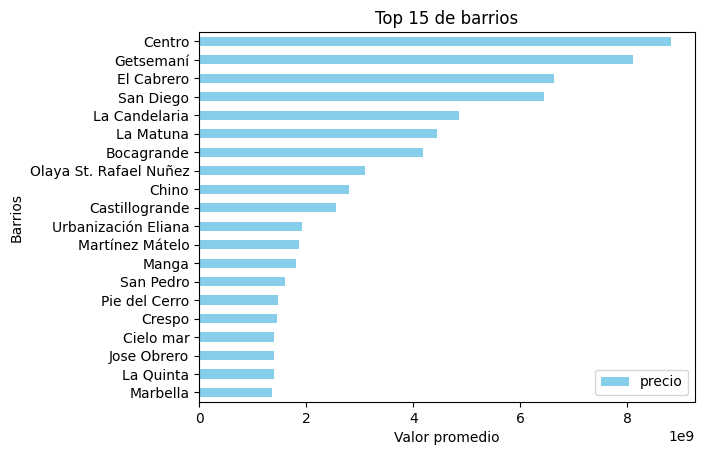

In [52]:
# Creando un gráfico de barras
conteo_localizacion.head(20).sort_values(by='precio', ascending=True).plot(kind='barh', color='skyblue',x='localizacion',y='precio')
# Añadir etiquetas y título
plt.title('Top 15 de barrios')
plt.xlabel('Valor promedio')
plt.ylabel('Barrios')

# Mostrar el gráfico
plt.show()

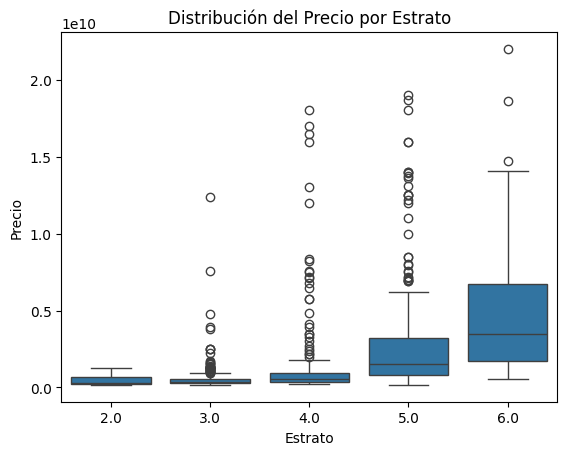

In [53]:
#Viendo la cantidad de valores atipicos se profundiza en los datos, observando la relacion entre precio y estrato

sns.boxplot(x='estrato', y='precio', data=df)

# Título y etiquetas
plt.title('Distribución del Precio por Estrato')
plt.xlabel('Estrato')
plt.ylabel('Precio')

# Mostrar el gráfico
plt.show()

In [54]:
# Calculo del valor promedio de metro cuadrado por barrio

# Precio por metro cuadrado
df['precio_m2'] = df['precio'] / df['metros_construidos']

# Agrupar por barrio y calcular el promedio del precio por metro cuadrado
promedio_m2_por_barrio = df.groupby('localizacion')['precio_m2'].mean().reset_index()

# Ordenar de mayor a menor según el precio por metro cuadrado
promedio_m2_por_barrio = promedio_m2_por_barrio.sort_values(by='precio_m2', ascending=False)


# Mostrar el resultado
promedio_m2_por_barrio.head(5)

,localizacion,precio_m2
89,San Diego,17882052.47
22,Centro,17102233.17
50,Getsemaní,14319734.78
31,El Cabrero,12976254.74
81,Olaya St. Rafael Nuñez,11397058.82


In [55]:
# Cantidad de Casas en venta en los diferentes estratos

frecuencia_estratos = df["estrato"].value_counts()
print(frecuencia_estratos)

estrato
5.00    253
3.00    241
4.00    225
6.00    131
2.00     26
Name: count, dtype: int64


In [56]:
# Agrupar por estrato y calcular el promedio del precio por metro cuadrado
promedio_m2_por_estrato = df.groupby('estrato')['precio_m2'].mean().reset_index()
promedio_m2_por_estrato.head(5)

,estrato,precio_m2
0,2.00,2711027.19
1,3.00,2661704.56
2,4.00,4684300.44
3,5.00,6794599.88
4,6.00,11317963.17


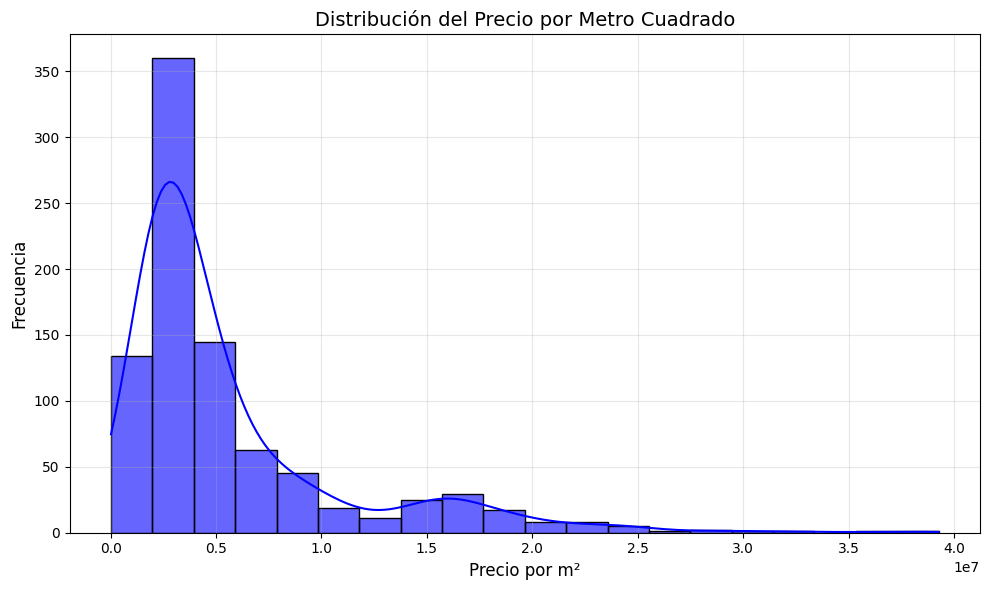

Estadístico de la prueba de Shapiro-Wilk: 0.723590782860261
Valor p: 1.0932845738522789e-35
Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.
Curtosis: 5.6941962206834305
Los datos tienen colas más gruesas (leptocúrtico).


In [69]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes el DataFrame df con la columna 'precio_m2'

# Histograma con KDE (Kernel Density Estimation)
plt.figure(figsize=(10, 6))
sns.histplot(df['precio_m2'], bins=20, kde=True, color='blue', alpha=0.6)

# Etiquetas y título
plt.title('Distribución del Precio por Metro Cuadrado', fontsize=14)
plt.xlabel('Precio por m²', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Prueba de normalidad de Shapiro-Wilk
stat, p_value = stats.shapiro(df['precio_m2'])

print(f"Estadístico de la prueba de Shapiro-Wilk: {stat}")
print(f"Valor p: {p_value}")

if p_value > 0.05:
    print("No se rechaza la hipótesis nula. Los datos siguen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.")

# Cálculo de la curtosis
curtosis = stats.kurtosis(df['precio_m2'])
print(f"Curtosis: {curtosis}")

if curtosis > 3:
    print("Los datos tienen colas más gruesas (leptocúrtico).")
elif curtosis < 3:
    print("Los datos tienen colas más delgadas (platicúrtico).")
else:
    print("Los datos tienen una distribución normal (mesocúrtico).")


  CODIGO                NOMBRE  UCG LOC  AREA_HA  PE  POB_BARRIO  TOTAL_HOMB  \
0   0150       DANIEL LEMAITRE 3.00  LH    59.67  P3    17346.00     8506.00   
1   0200           SANTA MARIA 3.00  LH     8.75  P2     5396.00     2634.00   
2   0250              CANAPOTE 3.00  LH    23.60  P2     7750.00     3750.00   
3   0300  SAN PEDRO Y LIBERTAD 2.00  LH    17.19  P2     4440.00     2195.00   
4   0350       SIETE DE AGOSTO 3.00  LH    12.82  P2     6751.00     3295.00   

   TOTAL_MUJE  NO_LEE_ESC                                           geometry  
0     8840.00     1436.00  POLYGON ((842131.215 1645842.043, 842048.374 1...  
1     2762.00      451.00  POLYGON ((842462.954 1646801.211, 842457.697 1...  
2     4000.00      679.00  POLYGON ((841472.83 1646291.422, 841471.824 16...  
3     2245.00      370.00  POLYGON ((841414.301 1646838.488, 841411.788 1...  
4     3456.00      638.00  POLYGON ((842701.018 1646249.319, 842692.207 1...  


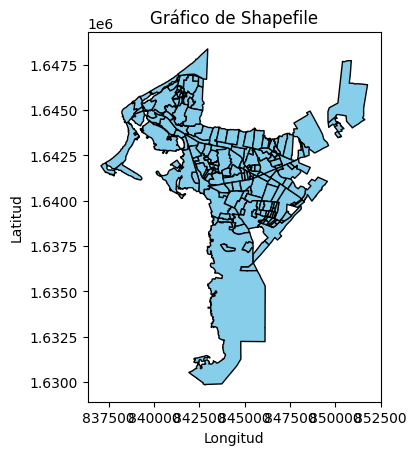

In [58]:
# Lee el archivo .shp
gdf = gpd.read_file('../Data/shapefiles/Barrios/Barrios.shp')
gdf=gdf.iloc[:185]
# Muestra las primeras filas del GeoDataFrame
print(gdf.head())

# Grafica el contenido geoespacial del archivo .shp
gdf.plot(color='skyblue', edgecolor='black')

# Añadir título y etiquetas si es necesario
plt.title('Gráfico de Shapefile')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Muestra el gráfico
plt.show()

In [59]:
# Convierte los nombres de localización y NOMBRE a minúsculas
conteo_localizacion['localizacion'] = conteo_localizacion['localizacion'].str.lower()
gdf['NOMBRE'] = gdf['NOMBRE'].str.lower()


In [60]:
print(gdf['NOMBRE'].dtype)
print(conteo_localizacion.index.dtype)


object
int64


In [61]:
# Convertir el índice de conteo_localizacion a cadenas
conteo_localizacion.set_index('localizacion', inplace=True)
conteo_localizacion.index = conteo_localizacion.index.astype(str)

# Realizar el merge
gdf_conteo = gdf.merge(conteo_localizacion, left_on='NOMBRE', right_index=True, how='left')

# Verificar el resultado del merge
print(gdf_conteo)



    CODIGO                    NOMBRE   UCG LOC  AREA_HA  PE  POB_BARRIO  \
0     0150           daniel lemaitre  3.00  LH    59.67  P3    17346.00   
1     0200               santa maria  3.00  LH     8.75  P2     5396.00   
2     0250                  canapote  3.00  LH    23.60  P2     7750.00   
3     0300      san pedro y libertad  2.00  LH    17.19  P2     4440.00   
4     0350           siete de agosto  3.00  LH    12.82  P2     6751.00   
..     ...                       ...   ...  ..      ...  ..         ...   
180   0060            flor del campo  6.00  LV    13.96  P2        0.00   
181   0080       ciudad bicentenario  6.00  LV   402.02  P2        0.00   
182   0070  urbanizacion colombiaton  6.00  LV    13.54  P2        0.00   
183   0090   villas de la candelaria  6.00  LV    17.71  P2        0.00   
184   8970           zona industrial 11.00  LI  1920.24  PC        0.00   

     TOTAL_HOMB  TOTAL_MUJE  NO_LEE_ESC  \
0       8506.00     8840.00     1436.00   
1       2634.

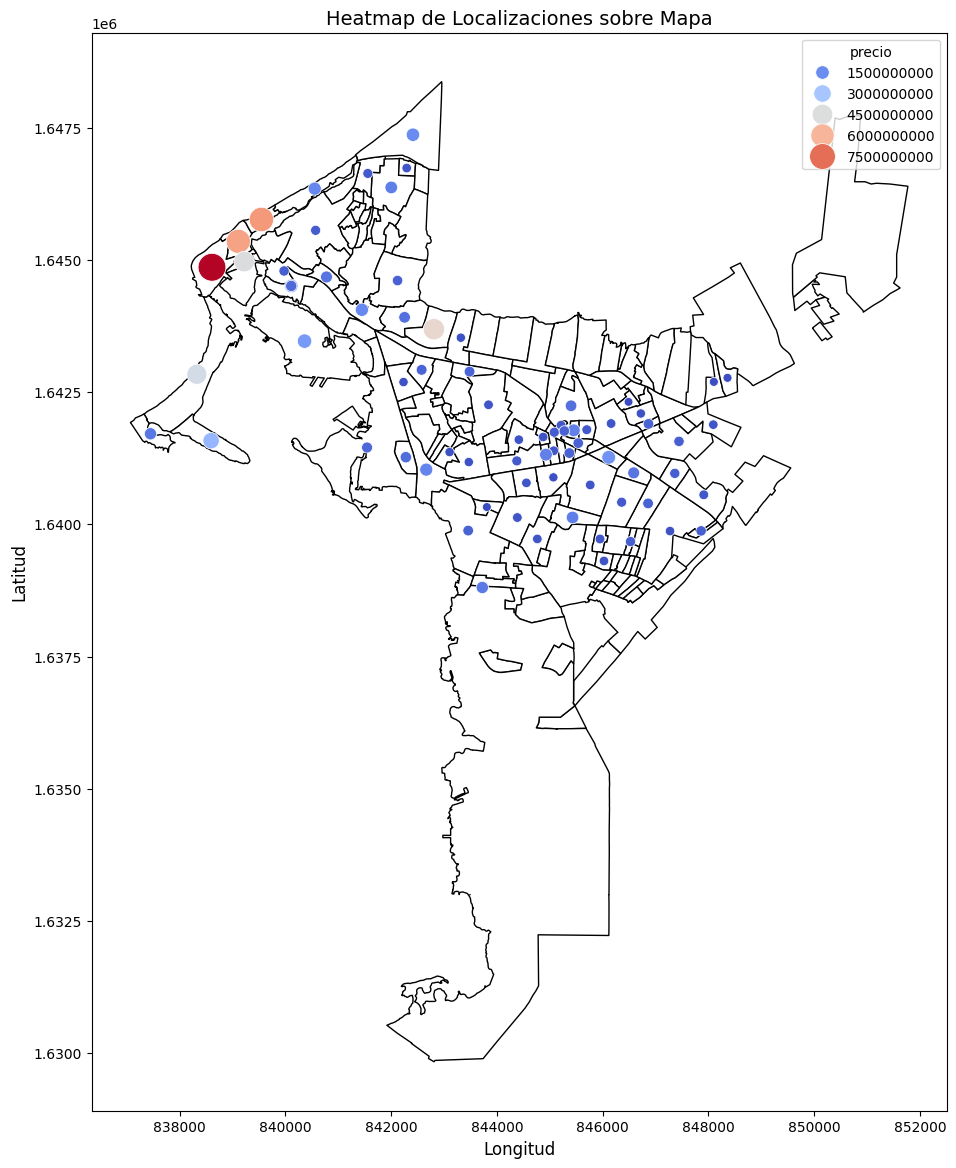

In [62]:
# centroides de geometry
gdf_conteo['geometry'] = gdf_conteo.geometry.centroid
gdf_conteo['x'] = gdf_conteo['geometry'].x
gdf_conteo['y'] = gdf_conteo['geometry'].y

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(18, 14))

# Graficar el shapefile en el fondo (el mapa)
gdf.plot(ax=ax, color='white', edgecolor='black')

# Graficar el heatmap de acuerdo con las ubicaciones (usando las coordenadas del centroide)
sns.scatterplot(x=gdf_conteo['x'], 
                y=gdf_conteo['y'], 
                hue=gdf_conteo['precio'], 
                palette='coolwarm',  # Paleta de colores
                size=gdf_conteo['precio'],  # Tamaño de los puntos según el conteo
                sizes=(40, 400),  # Rango de tamaños de los puntos
                legend=True,  # Desactiva la leyenda si no la necesitas
                ax=ax)  # Usa el mismo eje para superponer el gráfico

# Añadir título y etiquetas
plt.title('Heatmap de Localizaciones sobre Mapa', fontsize=14)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)

# Mostrar el gráfico
plt.show()

In [63]:
print(gdf_conteo[['x', 'y']].head())  # Verifica las primeras coordenadas

          x          y
0 842003.92 1646369.16
1 842295.57 1646735.87
2 841559.65 1646634.11
3 841086.67 1646365.61
4 842578.75 1646533.84


In [64]:
print(gdf_conteo['precio'])

0     1210000000.00
1      370000000.00
2      453333333.33
3               NaN
4               NaN
           ...     
180             NaN
181             NaN
182             NaN
183    220000000.00
184             NaN
Name: precio, Length: 186, dtype: float64


In [68]:

# Centroides segun la geometria del mapa
gdf_conteo['geometry'] = gdf_conteo.geometry.centroid
gdf_conteo['x'] = gdf_conteo['geometry'].x
gdf_conteo['y'] = gdf_conteo['geometry'].y

# Reproyectar las coordenadas de UTM a latitud/longitud (EPSG:4326)
gdf_conteo = gdf_conteo.to_crs(epsg=4326)

# Coordenadas para centrar el mapa en Cartagena
map_center = [10.3910, -75.4792]  # Latitud y Longitud de Cartagena
m = folium.Map(location=map_center, zoom_start=12)

# Añadir el shapefile del fondo (si es necesario)
folium.GeoJson(gdf).add_to(m)
gdf_conteo = gdf_conteo.dropna(subset=['precio']) 
# Agregar puntos sobre el mapa (usando los centroides)
for idx, row in gdf_conteo.iterrows():
    folium.CircleMarker(
        location=[row['y'], row['x']],  # Coordenadas del centroide
        radius=row['precio'] / 400000000,  # Tamaño del círculo (ajustar según sea necesario)
        color='blue',  # Color del borde
        fill=True,  # Relleno
        fill_color='coolwarm',  # Color de relleno
        fill_opacity=0.6,  # Transparencia del relleno
    ).add_to(m)

# Añadir HeatMap (opcional, si deseas un mapa de calor)
heat_data = [[row['y'], row['x']] for idx, row in gdf_conteo.iterrows()]
HeatMap(heat_data).add_to(m)

# Guardar el mapa en un archivo HTML
m.save('../Resultados/pdf/mapa.html')

# Mostrar el mapa
m


/tmp/ipykernel_229969/3681702596.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_conteo['geometry'] = gdf_conteo.geometry.centroid


In [14]:
df['precio'].sum()

410299584792